In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
import logging, os, json
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
def remove_outliers(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        lower_bound = df[column].quantile(0.05)
        upper_bound = df[column].quantile(0.95)
        df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df.reset_index(drop=True)


def remove_out(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            lower_bound = df[column].quantile(0.05)
            upper_bound = df[column].quantile(0.95)
            df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df.reset_index(drop=True)


def zscore_norm(series, window_size=30):
    roll_mean = series.rolling(window=window_size).mean()
    roll_std = series.rolling(window=window_size).std()
    return (series - roll_mean) / roll_std

In [16]:
data = pd.read_csv('block_data/block_stats.csv')
data = data.set_index('block_number').sort_index().drop_duplicates()
data['y'] = data['tcost_eth_max'].shift(1)
data = data.dropna()
data

,gas_price_gwei_count,gas_price_gwei_max,gas_price_gwei_std,gas_price_gwei_skew,gas_price_gwei_mean,gas_price_gwei_min,gas_used_count,gas_used_max,gas_used_std,gas_used_skew,...,gasPrice_eth_skew,gasPrice_eth_mean,gasPrice_eth_min,tcost_eth_count,tcost_eth_max,tcost_eth_std,tcost_eth_skew,tcost_eth_mean,tcost_eth_min,y
block_number,,,,,,,,,,,,,,,,,,,,,
18937473,142,149.732461,14.229585,6.697967,20.612597,16.494987,142,1870412,183105.571228,6.965168,...,0.0,2.061260e-08,1.649499e-08,142,0.031989,0.004237,5.259441,0.002393,0.000346,0.034262
18937474,118,45.391739,4.452365,3.727715,18.825592,16.624383,118,728368,115110.464771,2.664071,...,0.0,1.882559e-08,1.662438e-08,118,0.013201,0.002042,2.451081,0.001926,0.000349,0.031989
18937475,127,147.203487,12.874626,8.403745,19.417773,16.246220,127,890466,107480.071404,3.803718,...,0.0,1.941777e-08,1.624622e-08,127,0.021199,0.002707,4.399028,0.001879,0.000341,0.013201
18937476,251,374.966944,23.576517,13.912057,19.786731,15.827133,251,1325758,133079.453319,6.224304,...,0.0,1.978673e-08,1.582713e-08,251,0.040511,0.003555,6.995124,0.001903,0.000332,0.021199
18937477,115,316.906107,29.303776,9.215409,22.349033,16.906107,115,596409,99969.507009,2.344521,...,0.0,2.234903e-08,1.690611e-08,115,0.055929,0.005486,8.362672,0.002471,0.000355,0.040511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938317,149,1499.449773,132.540805,9.740740,35.073946,15.359143,149,986367,109589.413704,4.513174,...,0.0,3.507395e-08,1.535914e-08,149,0.174663,0.016022,9.062063,0.003625,0.000323,0.596711
18938318,147,742.900175,62.092338,10.952731,23.664993,15.023936,147,988162,135415.445712,4.015567,...,0.0,2.366499e-08,1.502394e-08,147,0.087335,0.009130,7.997118,0.002659,0.000316,0.174663
18938319,144,7411.745725,616.418081,11.981821,69.810088,14.953303,144,1034752,139057.768634,4.924311,...,0.0,6.981009e-08,1.495330e-08,144,0.712854,0.059363,11.944373,0.006537,0.000315,0.087335


<Axes: >

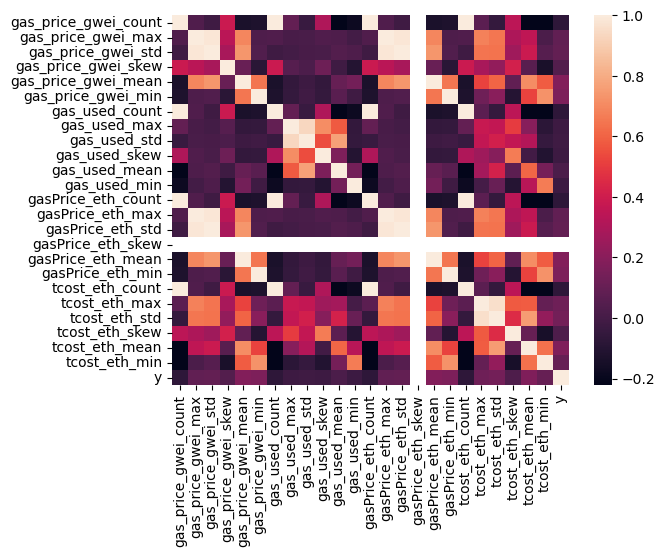

In [21]:
import seaborn as sns
sns.heatmap(data.corr())

/Users/armandmorin/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


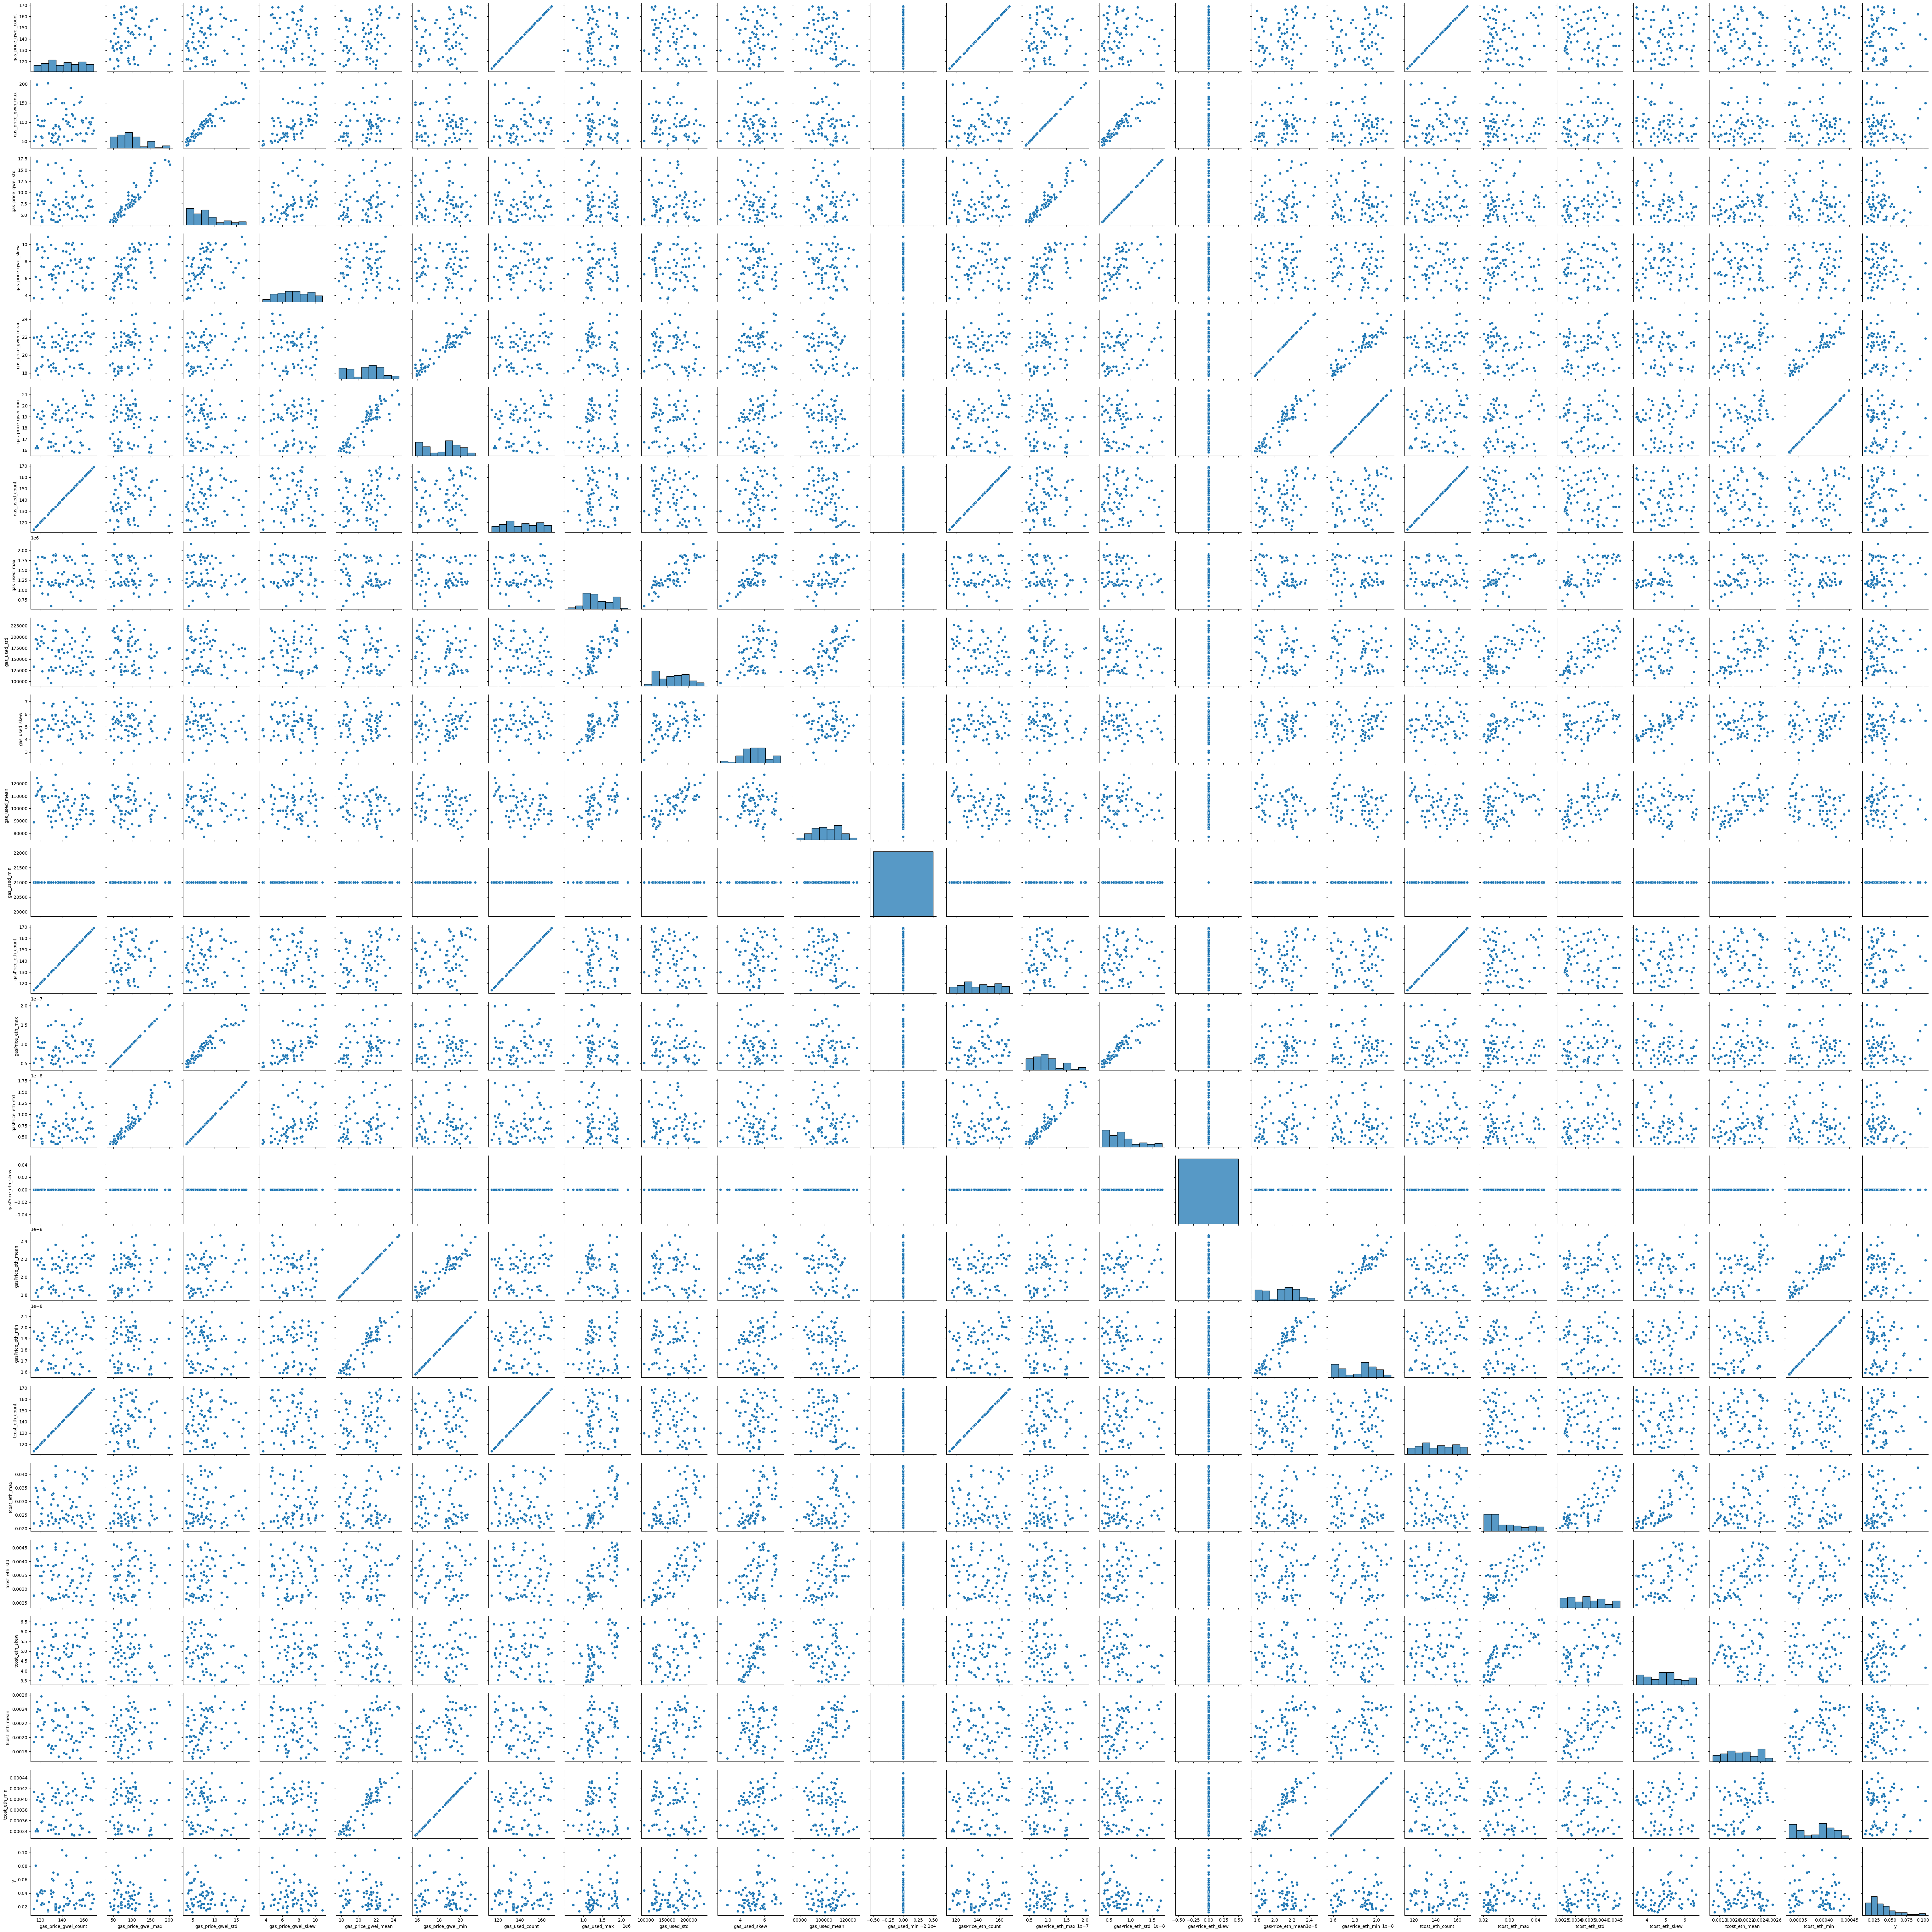

In [43]:
rm = remove_out(data)
sns.pairplot(rm)

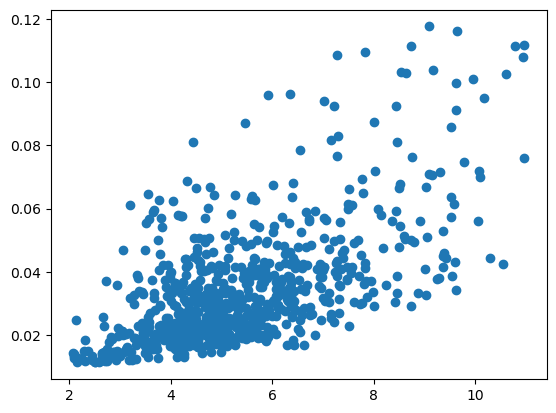

In [24]:
# perfect linearilty
f1 = 'tcost_eth_skew'
f2 = 'tcost_eth_max'

sub = remove_outliers(remove_outliers(data, f1), f2)
plt.scatter(sub[f1].values, sub[f2].values)

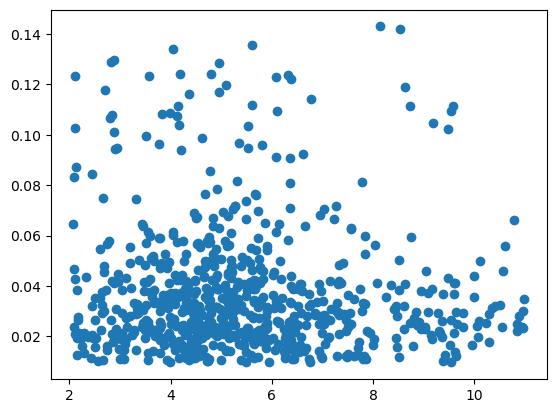

In [28]:
# perfect linearilty
f1 = 'tcost_eth_skew'
f2 = 'y'

sub = remove_outliers(remove_outliers(data, f1), f2)
plt.scatter(sub[f1].values, sub[f2].values)

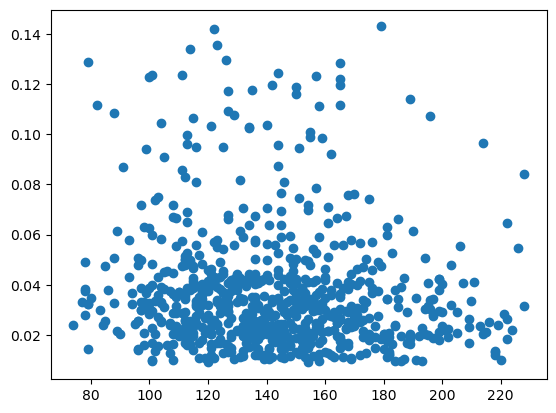

In [29]:
# perfect linearilty
f1 = 'tcost_eth_count'
f2 = 'y'

sub = remove_outliers(remove_outliers(data, f1), f2)
plt.scatter(sub[f1].values, sub[f2].values)

In [59]:
data.dropna()

,gas_price_gwei_count,gas_price_gwei_max,gas_price_gwei_std,gas_price_gwei_skew,gas_price_gwei_mean,gas_price_gwei_min,gas_used_count,gas_used_max,gas_used_std,gas_used_skew,...,gasPrice_eth_skew,gasPrice_eth_mean,gasPrice_eth_min,tcost_eth_count,tcost_eth_max,tcost_eth_std,tcost_eth_skew,tcost_eth_mean,tcost_eth_min,y
block_number,,,,,,,,,,,,,,,,,,,,,
18937473,142,149.732461,14.229585,6.697967,20.612597,16.494987,142,1870412,183105.571228,6.965168,...,0.0,2.061260e-08,1.649499e-08,142,0.031989,0.004237,5.259441,0.002393,0.000346,0.034262
18937474,118,45.391739,4.452365,3.727715,18.825592,16.624383,118,728368,115110.464771,2.664071,...,0.0,1.882559e-08,1.662438e-08,118,0.013201,0.002042,2.451081,0.001926,0.000349,0.031989
18937475,127,147.203487,12.874626,8.403745,19.417773,16.246220,127,890466,107480.071404,3.803718,...,0.0,1.941777e-08,1.624622e-08,127,0.021199,0.002707,4.399028,0.001879,0.000341,0.013201
18937476,251,374.966944,23.576517,13.912057,19.786731,15.827133,251,1325758,133079.453319,6.224304,...,0.0,1.978673e-08,1.582713e-08,251,0.040511,0.003555,6.995124,0.001903,0.000332,0.021199
18937477,115,316.906107,29.303776,9.215409,22.349033,16.906107,115,596409,99969.507009,2.344521,...,0.0,2.234903e-08,1.690611e-08,115,0.055929,0.005486,8.362672,0.002471,0.000355,0.040511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938317,149,1499.449773,132.540805,9.740740,35.073946,15.359143,149,986367,109589.413704,4.513174,...,0.0,3.507395e-08,1.535914e-08,149,0.174663,0.016022,9.062063,0.003625,0.000323,0.596711
18938318,147,742.900175,62.092338,10.952731,23.664993,15.023936,147,988162,135415.445712,4.015567,...,0.0,2.366499e-08,1.502394e-08,147,0.087335,0.009130,7.997118,0.002659,0.000316,0.174663
18938319,144,7411.745725,616.418081,11.981821,69.810088,14.953303,144,1034752,139057.768634,4.924311,...,0.0,6.981009e-08,1.495330e-08,144,0.712854,0.059363,11.944373,0.006537,0.000315,0.087335


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.copy()
for col in X.columns:
    X[col] = zscore_norm(X[col], 10)
X = X.drop(columns=['y']).fillna(0)#.dropna()
y = data['y'].dropna()
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(924, 24) (924,)


In [71]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_lr), 3))
print("MSE:", round(mean_squared_error(y_test, y_pred_lr), 3))
print("R2 Score:", round(r2_score(y_test, y_pred_lr), 3))

print("\nDecision Tree Performance:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_tree), 3))
print("MSE:", round(mean_squared_error(y_test, y_pred_tree), 3))
print("R2 Score:", round(r2_score(y_test, y_pred_tree), 3))

Linear Regression Performance:
MAE: 0.037
MSE: 0.006
R2 Score: -0.088

Decision Tree Performance:
MAE: 0.046
MSE: 0.012
R2 Score: -1.18


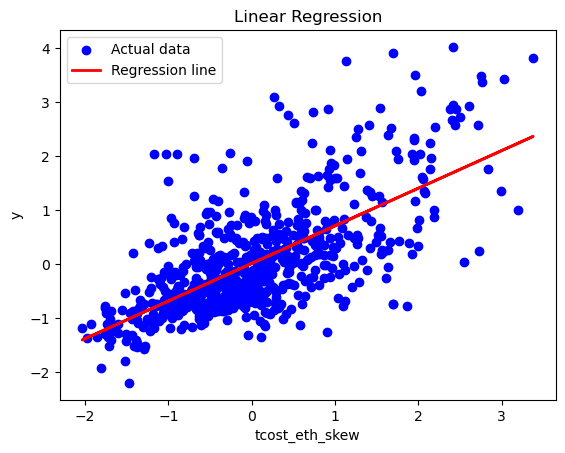

In [72]:
f1 = 'tcost_eth_skew'
f2 = 'tcost_eth_max'

sub = remove_outliers(remove_outliers(data, f1), f2)
sub[f1] = zscore_norm(sub[f1], window_size=30)
sub[f2] = zscore_norm(sub[f2], window_size=30)
sub = sub.dropna()
X = sub[[f1]]  # Features - ensure this column exists in your DataFrame
y = sub[f2]  # Target variable - replace 'y' with the actual name of your target column

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual data')

plt.plot(X, predictions, color='red', linewidth=2, label='Regression line')
plt.xlabel('tcost_eth_skew')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [77]:
data = pd.read_pickle('data/WETH_USDC_pool_swap-2024-02-02_2024-01-31.pkl')
data

,amount0,amount1,amountUSD,origin,sender,recipient,timestamp,symbol0,symbol1,price
time,,,,,,,,,,
2024-02-02 03:38:23,-2301.902031,1,2303.24196925395254739746488064512,0xfa1fe308a3d99c2b6a6bb73eddcf7c550dec7b39,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,1706845103,USDC,WETH,2303.109740
2024-02-02 03:38:11,-46.038173,0.02,46.06490557507905094794929761290239,0x1229966c7ea6dbaf6cb2d1227d9206da6046dc46,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xce16f69375520ab01377ce7b88f5ba8c48f8d666,1706845091,USDC,WETH,2303.109740
2024-02-02 03:37:11,-1543.971264,0.670733917852860781,1544.86625791779820910586062667538,0xcbd505c41eebd424156fc466cfe1e56e038d0d20,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0xcbd505c41eebd424156fc466cfe1e56e038d0d20,1706845031,USDC,WETH,2303.109740
2024-02-02 03:36:23,3380,-1.466879146542257883,3380.271570810962260033587017919912,0x1571929fe6d51bd7d6538939d81fa389a3c19d55,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,1706844983,USDC,WETH,2303.109740
2024-02-02 03:36:23,-259.266374,0.112631508742000762,259.4174556310667021049574955648599,0xf9e032cb55d0dc4e3754dce32beee23b9981773c,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xf9e032cb55d0dc4e3754dce32beee23b9981773c,1706844983,USDC,WETH,2303.109740
...,...,...,...,...,...,...,...,...,...,...
2024-01-31 23:36:23,2600,-1.136731166910899805,2595.640262888095744782589554310411,0xedc088447a4f700223271932ae3caf6f468c4fe2,0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67,0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67,1706744183,USDC,WETH,2286.130478
2024-01-31 23:35:59,-1.009657,0.000441870636514373,1.008470349824363106908659670099043,0xfa15ff67d11bc3d195e916fa2dab2a9921a24cb6,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xce16f69375520ab01377ce7b88f5ba8c48f8d666,1706744159,USDC,WETH,2286.130478
2024-01-31 23:35:59,8286.92719,-3.623156987584931619,8273.11905666584078569913007260794,0xf02fa37d621e7f84ea4d0e2c9927cc1a3414afeb,0xa9c0cded336699547aac4f9de5a11ada979bc59a,0xa9c0cded336699547aac4f9de5a11ada979bc59a,1706744159,USDC,WETH,2286.130478


In [73]:
data = pd.read_pickle('data/WETH_USDC_pool_swap-2024-02-02_2024-01-31.pkl')
data = data.set_index('block_number').sort_index().drop_duplicates()
data['y'] = data['tcost_eth_max'].shift(1)
data = data.dropna()

# perfect linearilty
f1 = 'tcost_eth_skew'
f2 = 'tcost_eth_max'

sub = remove_outliers(remove_outliers(data, f1), f2)
plt.scatter(sub[f1].values, sub[f2].values)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte